# Apa itu Data Preparation atau Data Wrangling?


# Pendahuluan
"Data preparation accounts for about 80% of the work of data scientists"

Kutipan di atas diambil dari salah satu artikel blog online Forbes berdasarkan hasil survey terhadap 80 orang data scientist yang dilakukan oleh salah satu provider data enrichment.

Selengkapnya dapat Anda lihat pada url berikut:

https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says

Masih dari link yang sama, berikut adalah pie chart yang merepresentasikan porsi dari pekerjaan data scientist. Proses data preparation di chart ini adalah Collecting data sets (19%) dan Cleaning and organizing data (60%).
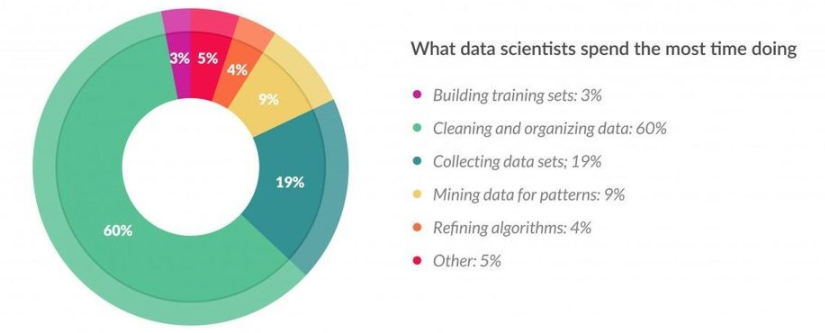

Dengan demikian, keterampilan untuk melakukan data preparation atau saat ini sering disebut sebagai data wrangling adalah mutlak untuk seluruh data scientist dan data engineer.

Lalu apa saja yang dilakukan di proses ini?

Data wrangling adalah proses membaca data dari berbagai sumber dan merubah isi dan struktur sehingga dapat digunakan untuk analisa.

Data cleansing biasanya melibatkan isi yang perlu diubah karena kadang data dimasukkan dari sistem yang berbeda.Bertolak belakang dengan anggapan bahwa dengan sistem, data akan bersih dan standar. Pada kenyataannya, bisnis berkembang lebih cepat dibandingkan dengan pembuatan sistem sehingga banyak design dirubah di tengah jalan untuk mengakomodir hal ini, dan isi menjadi "berantakan". Penyebab utama lainnya tentunya adalah sistem entri data yang manual.

Contoh yang paling sering adalah informasi pelanggan (customer). Di satu sistem namanya boleh memasukkan gelar, dan di satu sistem tidak boleh… jadinya ada dua nama yang serupa tapi tak sama sebagai berikut: "Agus Cahyono S.Kom." dan "Cahyono, Agus".

Struktur perlu dirubah karena berbagai alasan, salah satu yang paling penting adalah tiap algoritma mensyaratkan struktur data yang berbeda dan optimal.

Sebagai contoh: transaksi penjualan untuk satu algoritma bisa menggunakan row-based transaction. Sedangkan algoritma lain harus menggunakan sparse-matrix.

Data wrangling adalah topik yang sangat besar, DQLab coba merancang materi ini dengan pembagian ke beberapa course,  artikel dan project – semuanya bisa diakses di satu platform yang sama.

Namun hampir sebagian besar proses data wrangling sehari-hari dengan R akan dicakup oleh course ini. Jika proses harus melibatkan tahapan yang lebih sulit dan tidak dicakup di dalam course ini juga akan diinformasikan lebih lanjut.

https://youtu.be/z0kkLAHdw6k

# Dataset-dataset Yang Akan Digunakan
Untuk kepentingan penguasaan melalui praktek, sepanjang course ini kita akan bekerja dengan beberapa dataset berikut:

1. Dataset kependudukan.dki dalam bentuk file teks (csv, tsv) dan dalam bentuk Excel. Semuanya dengan isi data yang sama, namun ketika menggunakan R untuk membaca, akan ditunjukkan karakteristik masing-masing yang perlu diperhatikan.
2. Dataset pelanggan dalam bentuk file Excel, dimana kita akan melakukan beberapa proses pengolahan text dan tanggal di dataset ini.
3. Dataset transaksi dalam bentuk database MySQL, dimana penguasaan skillset SQL yang diperlukan dapat dicapai.
4. Dataset ini akan dijelaskan lebih lanjut pada saat kita mulai mempraktekkan dataset ini.

# Penutup
Data preparation atau data wrangling adalah proses yang memakan waktu dan tenaga paling besar bagi seorang data scientist, yaitu sampai 80 persen. Detilnya, pembacaan sumber data memakan waktu sampai 20 persen, dan mengorganisasikan dan membersihkan data memakan waktu sampai 60 persen.

Dengan demikian, skillset untuk data wrangling ini merupakan suatu yang mutlak dikuasai oleh para data scientist.

R menyediakan banyak function yang bisa digunakan untuk memudahkan Anda dalam menguasai skillset data wrangling ini.

Course ini akan mencakup cukup banyak praktek data wrangling sebagai bekal untuk mengolah data sehari-hari. Dimulai dari pemahaman mengenai konsep missing data (data yang kosong) dan factor sebagai tipe data yang penting, Anda akan diajak tahap demi tahap menguasai pengolahan teks, bekerja dengan tanggal, menggabungkan data, dan mentransformasi struktur data.

# Pendahuluan
Dalam perjalanan Anda sebagai data scientist ataupun data engineer, pasti akan menghadapi kolom dengan sebagian data tidak terisi atau kosong. Ini disebut dengan missing value atau nilai yang hilang.

Menyadari hal ini adalah satu tahap penting karena kita akan sadar bahwa hal tersebut adalah lumrah terjadi.

Tahap selanjutnya, kita perlu dua hal:

1. Bagaimana missing value direpresentasikan, ini penting sehingga kita bisa identifikasi apakah nilai hilang karena dari awal memang ga ada, apakah karena operasi matematika, dan lain-lain.
2. Dengan mengetahui representasi ini, kita dapat melakukan sesuatu terhadapnya. Atau singkat dapat dikelola (manage) dengan baik.

Kedua hal tersebut sangat penting terutama bagi Anda yang berangkat dari SQL ataupun bahasa programming lain, dimana ada satu reprentasi missing value saja, yaitu NULL.

Sepanjang bab ini kita akan membahas representasi yang bisa dianggap missing value yaitu NA, NULL dan NaN. Dan bagaimana kita melakukan banyak hal dengan missing value ini.

# NA (Not Available)
NA adalah representasi utama dari missing value di R, dan merupakan suatu nilai atomik.

Artinya posisi NA sama dengan contoh nilai-nilai atomik bilangan seperti 1, 2 atau 100. Juga sama dengan contoh nilai karakter seperti "a", "b",  atau "g".

Karena angka dan karakter seperti contoh di atas sering disebut sebagai konstanta, maka NA adalah konstanta untuk missing value.

Dengan demikian, secara singkat NA adalah:

1. Representasi missing value
2. Merupakan konstanta atau nilai atomik

NA tidak bisa digunakan sebagai variable karena merupakan keyword, dan perhatikan penulisan NA dimana kedua karakter adalah huruf besar.

# NA dan default type
Untuk menggunakan NA adalah sama dengan nilai konstanta lain, cukup mengetikkan NA.

Sebagai contoh, jika kita ketikkan NA di console maka akan muncul hasil berikut:

> NA

Angka [1] adalah posisi index dari konstanta (yang selalu bernilai 1) dan NA adalah nilainya sendiri. Dan NA ini secara default adalah representasi missing value untuk tipe data logical.

Ini kita bisa cek dengan perintah yang menggunakan function typeof, sebagai berikut.

typeof(NA)

Hasilnya akan muncul sebagai berikut:

> typeof(NA)

Tentunya, NA adalah representasi missing value untuk seluruh tipe lain, tapi secara default adalah untuk logical dulu. Namun akan kita jelaskan lebih jauh di bagian lain pada bab ini.

# Menggunakan function is.na

Pada saat kita membandingkan nilai atomik biasanya kita menggunakan operator ==, misalkan untuk periksa suatu variabel x yang bernilai 3 – yang sebelumnya kita juga telah memasukkan angka yang sama – kita bisa melakukan hal berikut.

x <- 3
x == 3
Maka hasil eksekusi perintah di atas akan menghasilkan nilai TRUE seperti terlihat dari potongan code lengkap berikut.

x <- 3
> x == 3
TRUE

Nah, ini tidak berlaku untuk NA. Jadi jika nilai x kita isi dan cek dengan cara yang sama sebagai berikut.

x <- NA
x == NA

Hasil eksekusinya tidak akan menghasilkan TRUE, tapi tetap NA.

Pengecekan seperti ini tentunya tidak mungkin dilakukan jika kita menggunakan konstruksi percabangan keputusan seperti if ataupun konstruksi perulangan seperti while.

Nah, untuk mengatasi hal ini R menggunakan function bernama is.na dengan input berupa konstanta atau variabel. Mari kita ubah simbol == contoh di atas menggunakan function is.na seperti berikut.

x <- NA
is.na(NA)

Kali ini hasil eksekusinya akan bernilai TRUE.

# Variasi NA dan is.na

Seperti disebutkan sebelumnya, NA adalah merupakan nilai atomik dan konstanta, dan awalnya merupakan representasi missing value dari logical.

Apa artinya?

Ini jika dihubungkan dengan tipe data lain di R seperti vector – dimana isinya harus seragam tipe datanya – maka vector tersebut hanya boleh berisi nilai TRUE dan FALSE.

Sebagai perbandingan, mari kita lihat contoh pembuatan satu vector dengan isi campuran dari integer dan logical berikut.

c(1, 2, FALSE, 3)
Hasil akan ditampilkan sebagai berikut.

[1] 1 2 0 3
Terlihat bahwa FALSE di atas dikonversi (beradaptasi) menjadi 0. Adaptasi ini juga disebut dengan coerce di dokumentasi R.

Lalu bagaimana dengan missing value NA?  

NA juga memiliki konstanta yang digunakan untuk beradaptasi, yaitu:

NA_integer_ untuk representasi tipe data "integer"
NA_real_ untuk representasi tipe data "double"
NA_complex_ untuk representasi tipe data "complex"
NA_character_ untuk representasi tipe data "character"
Dan semuanya memiliki nilai NA. Jika kita cek tipe data dari salah satu variasi missing value NA sebagai berikut

typeof(NA_real_)
Maka kita akan dapatkan hasil "double" seperti berikut.

> typeof(NA_real_)
[1] "double"

Namun jika menggunakan is.na maka seluruhnya akan mengembalikan hasil TRUE.

Untuk lebih jelasnya mari kita lakukan praktek berikut.

Tugas Praktek

Cobalah ketikkan empat function typeof untuk menggantikan bagian […1…] s/d […4…] code editor, dengan masing-masing secara berurut mengecek NA_integer_, NA_real_, NA_complex_ dan NA_character_.

Kemudian ketikkan lagi function is.na untuk menggantikan bagian […5…] s/d […8…] code editor secara berurut untuk  NA_integer_, NA_real_, NA_complex_ dan NA_character_.

typeof(NA_integer_)
typeof(NA_real_)
typeof(NA_complex_)
typeof(NA_character_)
is.na(NA_integer_)
is.na(NA_real_)
is.na(NA_complex_)
is.na(NA_character_)

# Coercion pada Vector yang mengandung NA
Dengan adanya variasi NA yang dijelaskan pada content sebelumnya, R akan secara otomatis menggantikan NA yang secara default tipe data logical menjadi variasi tersebut.

Jadi jika kita mengetik hasil berikut.

c(1, 2, NA, 4, 5)

maka sebenarnya konstanta NA di atas akan diganti menjadi NA_real_. Namun tentunya ini ga akan terlihat, hanya terjadi sebagai proses di belakang layar oleh R.

Tugas Praktek

Isi bagian […1…] pada code editor dengan variable bernama isi.vector yang isinya c(1,2,3,NA,3,1). Kemudian kita akan menggunakan konstruksi lapply untuk mengecek semua tipe, isi […2…] dengan variable yang telah kita buat, dan […3…] dengan function typeof.

Terakhir isi bagian […4…] dengan function is.na dan isi dengan variable isi.vector.

In [ ]:
#Membuat vector bernama isi.vector dengan isi bilangan, dimana salah satunya memiliki missing value
isi.vector <-  c(1,2,3,NA,3,1)

#Mengecek keseluruhan tipe data dengan perulangan lapply dan typeof
lapply(isi.vector, typeof)

#Menggunakan is.na untuk mengecek keberadaan missing value dari tiap elemen pada vector 
is.na(isi.vector)

# NULL
NULL adalah nilai yang banyak digunakan di bahasa pemrograman lain ataupun SQL (Structured Query Language) untuk merepresentasikan objek yang tidak ada atau null object (missing object) atau nilai yang tidak ada (missing value).

Di dalam R, missing value telah direpresentasikan dengan NA. Nah, untuk missing object inilah kita menggunakan NULL di R.

Atau lebih detilnya, NULL adalah suatu object khusus di R yang digunakan untuk merepresentasikan nilai atau object yang tidak terdefinisikan.

# Ringkasan Perbandingan NA dan NULL
Kita telah membahas mengenai NA dan NULL pada teks dan praktek sebelumnya. Untuk memudahkan pemahaman, berikut adalah rangkuman perbedaan terhadap keduanya.
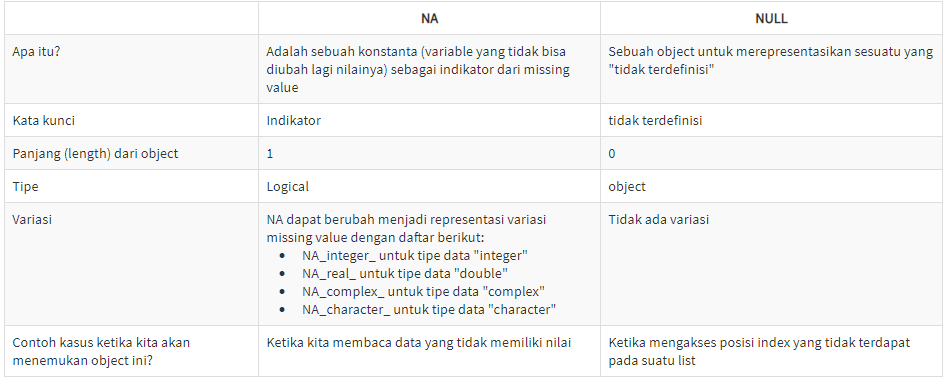
Keterangan:

Artinya NA adalah representasi missing value yang "masih" memiliki nilai logika – yang berfungsi sebagai indikator.
NULL sendiri adalah objek tidak berbentuk, maka itu tidak terdefinisi dan panjangnya 0.
Salah satu operasi yang akan menghasilkan NULL adalah pada saat kita mengakses nama element yang tidak terdapat di dalam suatu list.

# NULL dan List
Berbeda dengan vector, list akan menyimpan NULL apa adanya. Sebagai contoh, perintah berikut membuat list dengan 5 elemen dimana terdapat NULL dan NA di dalam list ini.

isi.list <- list(1, NULL, 3, NA, 5)
Jika kita tampilkan isinya, maka akan terlihat sebagai berikut.

> isi.list
[[1]]
[1] 1

[[2]]
NULL

[[3]]
[1] 3

[[4]]
[1] NA

[[5]]
[1] 5
Terlihat dari tampilan, NULL diisi pada list di indeks kedua. Dan dengan demikian, jika dihitung jumlah elemennya akan mendapatkan hasil 5.

> length(isi.list)
[1] 5

# Inf untuk mewakili Infinite Number
Setelah mengenalkan NA dan NULL sebagai represntasi missing value dengan cukup detil pada bagian sebelumnya, sekarang kita masuk ke dua representasi angka yaitu Inf dan NaN.

Inf adalah singkatan dari infinite number atau representasi angka tidak terhingga. Semua pembagian angka bukan nol dengan nol adalah angka tidak terbatas, misalkan 1/0 atau -20/0.

Berikut adalah contoh operasi pembagian dengan 0 dan hasilnya di R.

> 1/0
[1] Inf

> -20/0
[1] -Inf

# NaN (Not a Number)
NaN adalah representasi khusus untuk angka. Singkatan dari Not a Number, ini adalah representasi operasi matematika yang tidak bisa diwakili oleh angka apapun. Sering sekali bisa dianggap missing value tapi untuk hasil perhitungan.

Contoh perhitungan yang menghasilkan NaN adalah ketika angka 0 dibagi dengan 0. Ini tidak bisa dirasionalkan, sehingga NaN adalah representasi yang paling tepat.

Berikut adalah contoh perhitungan 0/0 di R dan hasilnya.

> 0/0
[1] NaN

# NaN dari hasil function log()
Perhitungan matematika lain yang juga menghasilkan NaN adalah nilai logaritma (log) dari bilangan negatif.

Berikut adalah contoh perhitungan logaritma dari dua bilangan, 100 dan -100 di R dan hasilnya.

> log(100)
[1] 4.60517

> log(-100)
[1] NaN

# Fungsi is.nan
Seperti halnya NA, jika kita membadingkan nilai NaN dengan menggunakan == maka hasilnya bukan TRUE/FALSE tapi menjadi NA, seperti pada contoh berikut.

> NaN == NaN
[1] NA
Untuk membandingkan NaN kita bisa gunakan function is.nan, seperti pada contoh berikut.

> is.nan(NaN)
[1] TRUE

# NaN dan is.na versus NA dan is.nan
Seluruh nilai NaN dapat diperiksa dengan fungsi is.na, sehingga hasilnya mengembalikan TRUE. Berikut adalah contohnya.

> is.na(NaN)
[1] TRUE
Dengan demikian, secara umum pada R bisa dikatakan NaN juga adalah missing value.

Namun tidak sebaliknya, semua nilai NA tidak akan mengembalikan nilai TRUE jika diperiksa dengan fungsi is.nan.

> is.nan(NA)
[1] FALSE
Dengan level yang jelas seperti ini, kita bisa memisahkan mana missing values dan kemudian mana saja bagian yang merupakan perhitungan yang menghasilkan angka yang tidak bisa didefinisikan (not a number).

# Menghitung Jumlah Missing Values dari satu Vector
Setelah mengenal semua representasi missing value – dalam hal ini NA dan NaN – dan fungsi untuk mengidentifikasinya, kita dapat melakukan banyak hal.

Salah satunya adalah mengetahui jumlah missing value yang terdapat pada data kita. Akan banyak contoh pada bagian-bagian berikutnya, tapi untuk memulai kita gunakan contoh vector.

Untuk melakukan perhitungan banyaknya nilai missing value di vector, kita gunakan gabungan function sum dan is.na sebagai berikut:

sum(is.na( variable_vector ) == TRUE)

Penjelasan konstruksi tersebut adalah sebagai berikut.
sum(…) = Function untuk menjumlahkan banyaknya elemen
is.na(…) == TRUE = Konstruksi untuk mengidentifikasi elemen mana yang merupakan missing value
variable_vector = Adalah variable yang isinya adalah vector dengan deklarasi c(…)

In [ ]:
#Masukkan code di bawah ini sesuai permintaan soal
isi.vector <- c(1,2,NA,4,5,NaN,6)
sum(is.na( isi.vector ) == TRUE)

# Kesimpulan
Selamat, dengan telah melewati bab ini maka Anda telah menguasai dasar untuk mengenal dan menangani missing value.

Ini penting karena tanpa pengetahuan yang cukup mengenai missing value ini, Anda akan mengalami kesulitan ketika berhadapan dengan beragam jenis data dan proses perhitungan yang pada kenyataannya memang tidak rapi.

Mari kita rangkum apa yang telah Anda tempuh sejauh ini:

1. Mengenal representasi missing value di R, yaitu NA (Not Available)
2. NA dan variasinya (NA_integer_, NA_real_, NA_complex_, dan NA_character_)
3. NULL sebagai representasi missing object
4. Perilaku NA dan NULL untuk vector dan list
5. NaN sebagai representasi missing value angka (Not a Number)
6. Penggunaan function is.na dan is.nan

Dengan bekal materi tersebut, kita telah siap untuk mengolah data pada saat membaca berbagai variasi data yang memiliki missing value.

Namun sebelum itu kita perlu menguasai lagi satu struktur data penting di R, yaitu factor.

# Apa itu Factor?
Factor adalah suatu variable di R yang menyimpan daftar nilai-nilai kategori atau nominal.

Berikut adalah beberapa contoh daftar nilai kategori yang bisa disimpan dalam factor:

1. Nama bulan: Januari, Februari, Maret.
2. Jenis pakaian: Atasan, Jeans, Rok, Kaos.
3. Satuan berat: kg, mg, ton, kwintal.
4. dan lain-lain.

Dengan demikian,  factor menyimpan nilai-nilai yang terbatas (diskrit). Nama bulan terdiri dari 12 nilai yaitu dari Januari s/d Desember.

Jika tidak terbatas atau kontinu, misalkan angka berat seperti 64.5 kg, 11.2 kg, 80.39 kg, dan seterusnya – maka ini tidak bisa digolongkan sebagai factor.

Karena sifat data dengan nilai terbatas ini, factor sering disebut juga sebagai categorical variable atau variabel kategorik.

# Pendahuluan
Factor adalah suatu tipe variabel yang intensif digunakan di R – dengan demikian menjadi sangat penting untuk mempelajari Factor ini.

Walaupun awalnya kelihatan sederhana, namun Factor adalah salah satu bagian dari R yang paling sering ditanyakan. Penyebabnya karena fungsi analisa dan grafik yang banyak memanfaatkan factor dan kadang hasilnya tidak sesuai – contoh kasus dan solusinya termasuk yang akan dibahas pada bab ini.

Secara keseluruhan, berikut adalah apa yang akan Anda pelajari mengenai factor pada bab ini:

1. Apa itu factor dan kenapa diperlukan?
2. Kapan factor digunakan
3. Cara membuat factor di R
4. Bagaimana sebenarnya nilai disimpan di dalam factor
5. Menggunakan function untuk merubah nilai factor
6. Merubah pengurutan di factor

Dengan menguasai keterampilan menggunakan factor ini, Anda akan lebih siap untuk melakukan banyak hal di R.

# Kenapa Factor, dan Kapan Sebaiknya Digunakan?
Factor adalah variabel yang sangat penting untuk digunakan pada kasus analisa statistik, menggambar grafik (plotting), pemodelan regresi ataupun machine learning.

Sebagai contoh kasus, maka fungsi plotting pada library ggplot2 akan mampu mengambil variabel sebagai legend jika direpresentasikan sebagai factor.
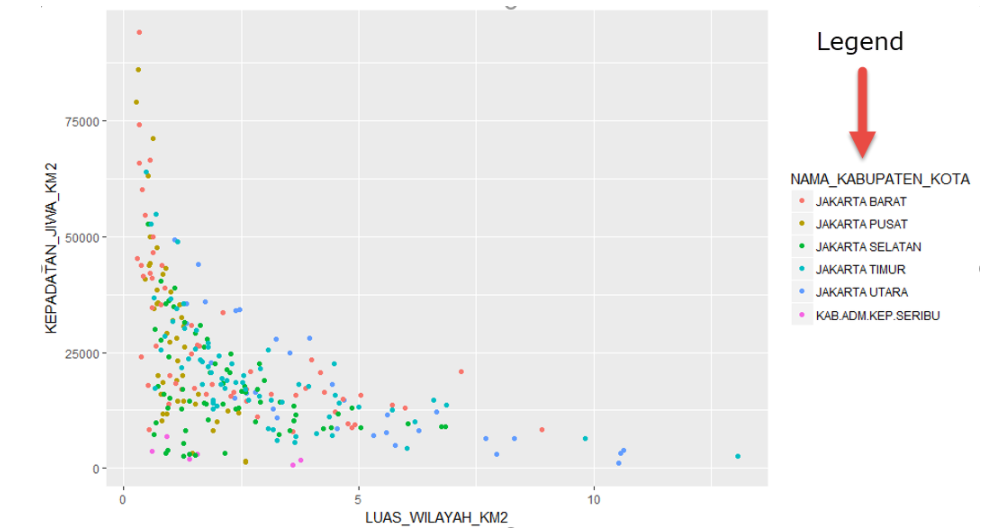
Banyaknya function yang menggunakan factor dikarenakan dengan adanya factor ini maka nilai kategoris lebih mudah diolah dan dianalisa.

Kita sebaiknya menggunakan factor ketika kita ingin

1. memastikan bahwa variable yang kita gunakan memiliki data terbatas (diskrit)
2. dan menginformasikan kepastian ini kepada function atau model analisa yang kita gunakan


# Membuat Factor di R
Factor dapat dibuat di R dengan function factor, dengan syntax paling sederhana sebagai berikut:

factor( x = vector)
atau

factor(vector)

Sebagai contoh, untuk membuat factor dari tiga nama bulan pertama pada kalender kita gunakan perintah berikut:

In [ ]:
#Buatlah factor dengan isi nilai teks "Jan", "Feb", dan "Mar"
factor(c("Jan","Feb","Mar"))


Terlihat ada dua hasil, yaitu nilai yang dimasukkan dan ada satu lagi output Levels. Berikut adalah penjelasan dari hasil di atas.
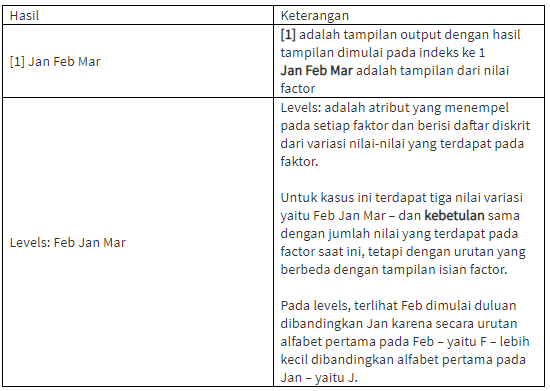

# Atribut levels dan class pada Factor

Perbandingan yang kontras antara factor dengan vector atau data.frame adalah pada factor terdapat atribut tambahan, yaitu levels.

Atribut sendiri adalah variable yang melekat dan menjadi bagian dari objek atau variable lain.

Selain atribut levels, pada factor terdapat juga atribut class.

Untuk melihat seluruh atribut pada kita menggunakan function attributes, berikut adalah contoh penggunaannya.

attributes(variable)

Dan nilai atribut tergantung penerapannya oleh R. Dan untuk levels, atributnya selalu bertipe karakter atau teks. Ini merupakan catatan penting yang sangat berguna dalam pemanfaatan factor lebih jauh.

Mari kita langsung lakukan praktek agar lebih jelas.

Tugas Praktek

Pada code editor, terdapat satu variable bernama faktor.bulan yang telah diisi dengan factor. Tampilkan atribut dari variable ini memasukkan perintah pada bagian […].

Jika semua berjalan lancar, maka hasilnya akan tampil sebagai berikut.

$levels
[1] "Feb" "Jan" "Mar"
$class
[1] "factor"
Dimana hasilnya terdapat dua atribut, yaitu levels dan class (ditandai dengan tanda $ pada nama atribut di depannya) dengan nilai-nilai atributnya (perhatikan semua memiliki tanda kutip pada nilainya – yang menandakan nilainya berupa karakter atau teks).

Dan disini terlihat atribut class berisi "factor" – menandakan objek ini memang adalah sebuah factor.

In [ ]:
#Variable factor bernama faktor.bulan dengan nilai teks "Jan", "Feb", dan "Mar"
faktor.bulan <- factor(c("Jan","Feb","Mar"))
attributes(faktor.bulan)

# Function levels dan class pada Factor
Atribut levels dan class dapat juga dilihat dengan function levels dan class dengan input berupa factor, dengan konstruksi sebagai berikut:

levels(variable)

class(variable)

Mari kita langsung lakukan praktek agar lebih jelas.

In [ ]:
#Variable factor bernama faktor.bulan dengan nilai teks "Jan", "Feb", dan "Mar"
faktor.bulan <- factor(c("Jan","Feb","Mar"))
levels(faktor.bulan)
class(faktor.bulan)

# Perulangan Nilai pada Factor
Jika pada praktek sebelumnya, factor diisi dengan tiga contoh nilai nama bulan pertama yang tidak berulang. Pada praktek kali ini kita coba akan memasukkan nilai yang berulang, dimana "Jan" dan "Mar" akan dimasukkan berulang.

Berikut adalah contohnya:

factor(c("Jan","Feb","Mar","Jan","Mar","Jan"))

Jika dieksekusi maka hasilnya adalah sebagai berikut:

In [ ]:
#Buatlah factor dengan teks "Jan", "Feb", "Mar","Jan","Mar", dan "Jan"
factor(c("Jan","Feb","Mar","Jan","Mar","Jan"))


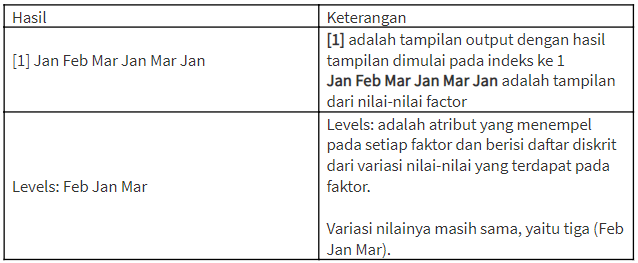

# Bagaimana sebenarnya Factor disimpan?
Di "belakang layar", factor sebenarnya memiliki 2 bagian:

Vector yang berisi nilai angka bulat (integer).
Vector yang berisi nilai-nilai kategori, ini disimpan dalam atribut levels – isinya selalu bertipe character / teks.
Untuk penjelasannya, mari kita perhatikan ilustrasi dari perintah factor berikut:

factor(c("Jan","Feb","Mar"))

Proses ini diilustrasikan pada gambar berikut. Untuk penjelasan, lihat paragraf setelah gambar ini.
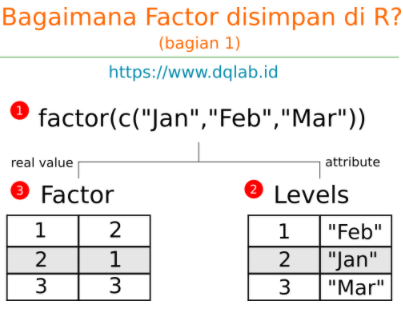

# Proses dari terjemahan perintah di atas:

R menerima perintah dengan function factor(c("Jan","Feb","Mar"))
R akan mencari variasi nilai (levels) dan diurutkan – dalam hal ini pengurutan alfabet – dan dipetakan berdasarkan index yang bernilai integer.
Disini nilai index 1 mewakili "Feb", 2 mewakili "Jan", dan 3 mewakili "Mar"
Dari levels, nilai-nilai "Jan", "Feb", "Mar" dicari nilai index-nya dan dimasukkan sebagai nilai-nilai pada factor ( 2, 1, 3 ).
Dan mari kita perhatikan satu lagi contoh ilustrasi dari pengembangan factor di atas:
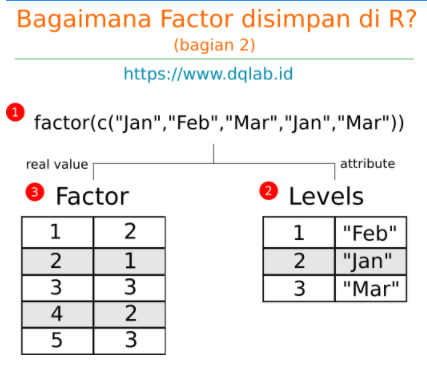
factor(c("Jan","Feb","Mar","Jan","Mar"))

Penjelasan dari proses di atas:

1. R menerima perintah dengan function factor(c("Jan","Feb","Mar","Jan","Mar"))
2. R akan mencari variasi nilai (levels) dan diurutkan – dalam hal ini pengurutan alfabet – dan dipetakan berdasarkan index yang bernilai integer.Disini nilai index 1 mewakili "Feb", 2 mewakili "Jan", dan 3 mewakili "Mar"
3. Dari levels, nilai-nilai "Jan", "Feb", "Mar","Jan","Mar" dicari nilai index-nya dan dimasukkan sebagai nilai-nilai pada factor ( 2, 1, 3, 2, 3).

Dengan demikian, kita simpulkan kembali dari ilustrasi di atas bahwa nilai dari factor sebenarnya adalah nilai bilangan bulat (integer) dengan nilai-nilai kategoris disimpan pada atribut levels.

# Penggunaan as.integer pada Factor
Untuk mengambil nilai-nilai index integer pada factor, kita bisa menggunakan function as.integer dengan syntax berikut.

as.integer(variable factor)
Mari kita langsung praktekkan dengan tugas berikut.

In [ ]:
#Buatlah factor dengan teks "Jan", "Feb", "Mar","Jan","Mar", dan "Jan"
factor.bulan <- factor(c("Jan","Feb","Mar","Jan","Mar","Jan"))
as.integer(factor.bulan)

# Mengganti "Jan" menjadi "Januari"
Sering sekali nilai kategori tidak sesuai dengan yang kita inginkan, sebagai contoh kita ingin nilai "Jan" ditampilkan sebagai "Januari". Di factor, kita lakukan ini dengan mengganti nilai levels pada index yang kita inginkan.

Mari kita perhatikan contoh faktor berikut. Terdapat satu variabel factor.bulan dengan levels "Feb", "Jan", dan "Mar".
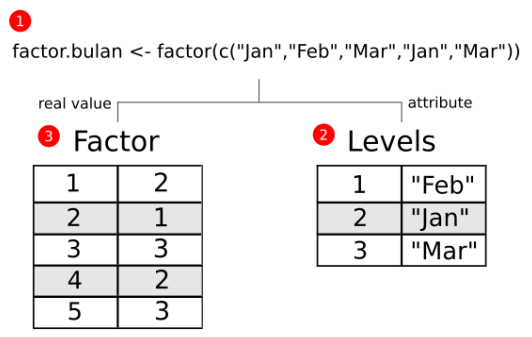

Jika kita ingin ganti "Jan" (posisi ke 2 pada levels) menjadi "Januari", maka perintah yang kita gunakan adalah:

levels(factor.bulan)
[2] <- "Januari"

# Berikut adalah penjelasan konstruksi perintah di atas.
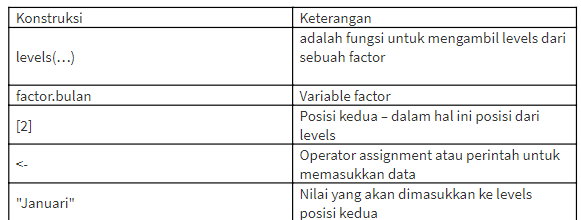

Tugas Praktek

Pada code editor, ganti bagian […1…] dengan perintah mengganti posisi ketiga dari levels dari "Mar" menjadi "Maret".

Kemudian ganti bagian […2…] dengan perintah untuk menampilkan variable faktor.bulan.

In [ ]:
#Buatlah factor dengan teks "Jan", "Feb", "Mar","Jan","Mar", dan "Jan"
factor.bulan <- factor(c("Jan","Feb","Mar","Jan","Mar","Jan"))
#Mengganti levels 
levels(factor.bulan)[2] <- "Januari"
levels(factor.bulan)[3] <- "Maret"
factor.bulan


# Angka sebagai Kategori
Jika sebelumnya kita memasukkan teks sebagai nilai kategori pada saat mendefinisikan factor. Bagaimana dengan angka?

Jika angka dimasukkan ke dalam vector, tetap akan dikenal sebagai nilai kategoris dan dimasukkan ke dalam levels. Dan karena itu angka akan dikonversi menjadi teks.

Tugas Praktek

Pada code editor, cobalah buat suatu variable factor bernama factor.umur dengan isi berupa vector c(12, 35, 24, 12, 35, 37) pada bagian […1…].

Kemudian tampilkan variable factor.umur tersebut pada bagian […2…].

In [ ]:
#Buatlah factor bernama factor.umur dengan isi c(12, 35, 24, 12, 35, 37)
factor.umur <- factor(c(12, 35, 24, 12, 35, 37))
#Tampilkan variable factor.umur 
factor.umur


# NA, NaN, NULL pada saat pembentukan Factor
NA, NULL dan NaN adalah tiga nilai khusus untuk merepresentasikan missing values atau nilai yang hilang di R.

Jika ketiganya dimasukkan ke dalam factor melalui deklarasi vector, maka prinsip berikut tetap berlaku:

1. Na dan NaN akan menjadi bagian dari isi factor, NULL akan dihilangkan
2. Hanya NaN yang akan dikenali sebagai levels

# Sebagai contoh, jika kita membuat factor dengan nilai berikut.

factor(c("Bandung", "Jakarta", NA, "Jakarta", NaN, "Medan", NULL, NULL, "Bandung"))
maka hasil tampilannya adalah sebagai berikut.

[1] Bandung Jakarta     Jakarta NaN     Medan   Bandung
Levels: Bandung Jakarta Medan NaN
Terlihat nilai NULL dibuang di tampilan isi factor, kemudian pada levels nilai NA juga dibuang.



Tugas Praktek

Pada code editor, buatlah satu variabel dengan nama factor.lokasi dengan isi sama persis dengan contoh pada lesson di atas – ketikkan ini pada bagian […1…].

Tampilkan variable factor tersebut pada bagian […2…].

In [2]:
#Buatlah variable factor.lokasi dengan isi berupa vector c("Bandung", "Jakarta", NA, "Jakarta", NaN, "Medan", NULL, NULL, "Bandung") 
factor.lokasi <- factor(c("Bandung", "Jakarta", NA, "Jakarta", NaN, "Medan", NULL, NULL, "Bandung"))

#Tampilkan factor.lokasi
factor.lokasib


NameError: name 'factor' is not defined

# Menghitung panjang Factor dengan length
Panjang factor dapat dihitung dengan menggunakan function length dengan syntax sederhana berikut.

length(variable)

Hanya nilai NULL yang tidak terhitung sebagai bagian dari factor.


Tugas Praktek

Pada code editor, terdapat satu variable factor.lokasi. Hitunglah panjang dari variable ini dengan menggunakan perintah length. Ketikkan perintah ini untuk menggantikan bagian […].

Jika semua berjalan dengan lancar, maka akan muncul hasil sebagai berikut.

[1] 7

In [ ]:
#Buatlah variable factor.lokasi dengan isi berupa vector c("Bandung", "Jakarta", NA, "Jakarta", NaN, "Medan", NULL, NULL, "Bandung") 
factor.lokasi <- factor(c("Bandung", "Jakarta", NA, "Jakarta", NaN, "Medan", NULL, NULL, "Bandung"))
#Tampilkan panjang dari variable factor.lokasi
length(factor.lokasi)


# Menyusun levels dari awal
Sejauh ini factor yang kita buat seakan-akan hanya bisa dirubah isinya, namun bukan urutannya. Ini kita bisa kendalikan juga dengan memberikan nilai-nilai kategori sesuai urutan yang kita inginkan pada argumen levels di function factors.

factor(…, levels = …)
Sebagai contoh, agar levels bernilai urut dari "Jan" s/d "Mar" maka pada saat membuat factor kita harus sisipkan argumen labels sebagai berikut:

factor(…, levels = c("Jan","Feb","Mar")

Cobalah perhatikan contoh ilustrasi dari dua pembuatan factor, dengan dan tanpa argumen levels.
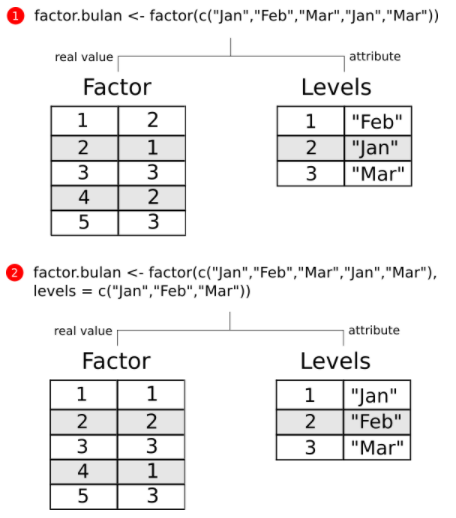

In [ ]:
#Variable factor dengan isi vector c("Jan","Feb","Mar","Jan","Mar") 
factor(c("Jan","Feb","Mar","Jan","Mar"), levels = c("Jan","Feb","Mar"))

# Kesimpulan
Factor adalah suatu tipe variabel yang intensif digunakan di R – dengan demikian menjadi sangat penting untuk mempelajari Factor ini.

Dari praktek keseluruhan yang telah dilakukan, kita telah mencapai tujuan untuk mempelajari factor dari aspek berikut:

Apa itu factor dan kenapa diperlukan?
Kapan factor digunakan
Cara membuat factor di R
Bagaimana sebenarnya nilai disimpan di dalam factor
Menggunakan function untuk merubah nilai factor
Merubah pengurutan di factor
Dengan menguasai keterampilan menggunakan factor ini, Anda sudah lebih siap untuk melakukan banyak hal di R.

# Pendahuluan
Setelah menguasai penanganan data dengan Factor dan missing values. Saatnya kita langsung membaca data asli untuk diolah.

Untuk pembacaan data pada course ini, DQLab membagi ke dalam dua bab. Bab ini dikhususkan untuk membaca data dari file teks dan Excel. Sedangkan di bab lain (pada Part 2) akan difokuskan untuk membaca dari database.

Kita akan gunakan satu dataset yang sama untuk bab ini, yaitu dataset Kependudukan Jakarta – ini dengan tujuan agar kita tidak bingung dengan banyaknya dataset.

Namun dataset ini akan datang dengan tiga variasi, yaitu:

1. Teks file dengan format csv (comma separated value) dengan nama dkikepadatankelurahan2013.csv.
2. Teks file dengan format tsv (tab separated value) dengan nama dkikepadatankelurahan2013.tsv.
3. File Excel dengan format xlsx dengan nama dkikepadatankelurahan2013.xlsx.

Fokus untuk bab ini adalah membaca ketiga sumber data saja tanpa pengolahan lebih lanjut – agar materi bisa lebih terfokus.

Beberapa bagian dari bab ini hampir sama dari sisi function yang digunakan pada bab Introduction to R dan Data Visualization with ggplot2, namun lebih detil melihat struktur data hasil dari pembacaan file.

# Dataset Kependudukan Jakarta
Dataset yang akan kita gunakan sepanjang praktek course ini adalah data wilayah dan kepadatan kependudukan pemerintah provinsi DKI Jakarta tahun 2013.  

DQLab sudah mengambil dan konversi file ini untuk digunakan dalam praktek kita.

Namun jika diinginkan, sumber dataset ini dapat didownload dari data.go.id dengan url lengkap berikut:

https://storage.googleapis.com/dqlab-dataset/datakependudukandki-dqlab.csv

Data kependudukan dipilih karena hampir seluruh organisasi, termasuk bisnis dan institusi pemerintah memerlukan ini untuk mengambil keputusan strategik. Sebagai contoh, dimana saya perlu membuka toko atau kantor cabang? Produk apa yang bakal laku di area tersebut?

Kemudian struktur dari dataset ini perlu diolah lebih lanjut agar optimal. Atas dasar kedua alasan inilah, data kependudukan dipilih untuk course data wrangling with R.

Berikut adalah tampilan data kependudukan DKI Jakarta tersebut jika dibuka di aplikasi Notepad. Perhatikan tanda pemisah antar kolom adalah menggunakan koma.

Dan ini adalah tampilan jika data tersebut dibuka di aplikasi Excel.
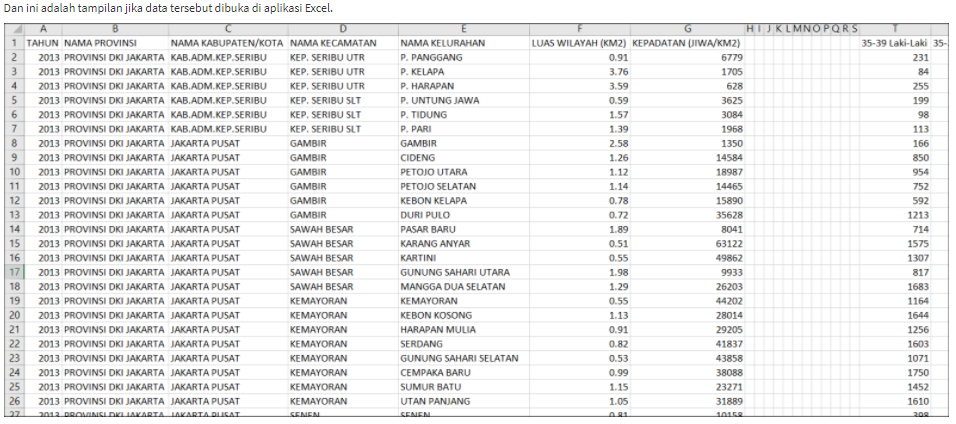

Terlihat bahwa ada 12 kolom (header dengan huruf H s/d S) yang kosong. Ini akan terbaca sebagai missing value.

Data tersebut memiliki 25 variable kolom dengan penjelasan sebagai berikut:

1. TAHUN: Tahun
2. NAMA PROVINSI: Nama provinsi di DKI Jakarta, dan nilainya hanya ada satu
3. NAMA KABUPATEN/KOTA: Nama kabupaten/kota di DKI Jakarta
4. NAMA KECAMATAN: Nama kecamatan di DKI Jakarta
5. NAMA KELURAHAN: Nama kelurahan di DKI Jakarta
6. LUAS WILAYAH (KM2): Luas wilayah (km persegi)
7. KEPADATAN (JIWA/KM2): Kepadatan penduduk (jiwa/km2)
8. 35-39 Laki-Laki: Jumlah penduduk laki-laki dengan rentang umur 35-39 tahun
9. 35-39 Perempuan: Jumlah penduduk perempuan dengan rentang umur 35-39 tahun
10. 40-44 Laki-Laki: Jumlah penduduk laki-laki dengan rentang umur 40-44 tahun
11. 40-44 Perempuan: Jumlah penduduk perempuan dengan rentang umur 40-44 tahun
12. 45-49 Laki-Laki: Jumlah penduduk laki-laki dengan rentang umur 45-49 tahun
13. 45-49 Perempuan: Jumlah penduduk perempuan dengan rentang umur 45-49 tahun
14. 50-54 Laki-Laki: Jumlah penduduk laki-laki dengan rentang umur 50-54 tahun
15. 50-54 Perempuan: Jumlah penduduk perempuan dengan rentang umur 50-54 tahun
16. 55-59 Laki-Laki: Jumlah penduduk laki-laki dengan rentang umur 55-59 tahun
17. 55-59 Perempuan: Jumlah penduduk perempuan dengan rentang umur 55-59 tahun
18. 60-64 Laki-Laki: Jumlah penduduk laki-laki dengan rentang umur 60-64 tahun
19. 60-64 Perempuan: Jumlah penduduk perempuan dengan rentang umur 60-64 tahun
20. 65-69 Laki-Laki: Jumlah penduduk laki-laki dengan rentang umur 65-69 tahun
21. 65-69 Perempuan: Jumlah penduduk perempuan dengan rentang umur 65-69 tahun
22. 70-74 Laki-Laki: Jumlah penduduk laki-laki dengan rentang umur 70-74 tahun
23. 70-74 Perempuan: Jumlah penduduk perempuan dengan rentang umur 70-74 tahun
24. >75 Laki-Laki: Jumlah penduduk laki-laki dengan rentang umur di atas 75  tahun
25. >75 Perempuan: Jumlah penduduk perempuan dengan rentang umur di atas 75 tahun  

Hampir seluruh kolom berisi nilai angka, kecuali empat kolom berikut: NAMA PROVINSI, NAMA KABUPATEN/KOTA, NAMA KECAMATAN, dan NAMA KELURAHAN.

# Membaca Dataset CSV
Untuk membaca file versi csv dari dataset kependudukan tersebut kita bisa gunakan function read.csv – function ini akan membaca isi dari file teks tersebut menjadi data.frame di R.

File csv yang akan kita baca berlokasi di url berikut:

https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv

Untuk membaca file tersebut kita gunakan function read.csv dengan perintah lengkap sebagai berikut.

penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")
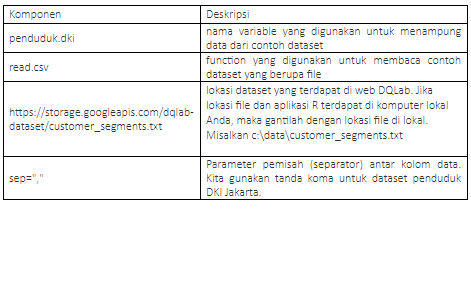
Jika terjadi error berikut, cobalah periksa kembali penulisan code – huruf besar, huruf kecil dan juga penulisan lokasi file – dengan teliti.

Error in file(file, "rt") : cannot open the connection

Jika tidak terjadi error maka langkah selanjutnya adalah menampilkan isi data dengan mengetikkan nama variable pelanggan pada code editor sebagai berikut.

penduduk.dki

In [ ]:
#Membaca dataset dengan read.csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")
penduduk.dki


# Profile Dataset dengan Function str
Adalah praktek yang sangat baik untuk mengenal atau melakukan profile tiap dataset yang sudah dibaca ke dalam R – dan secara sederhana di R dapat kita lakukan dengan perintah str.

Str akan menyajikan informasi tiap kolom dataset dalam format yang compact – satu baris informasi saja per row. Pendekatan singkat dan jelas ini membuat str menjadi function favorit dan efektif untuk mengenal data di tahap awal.

Syntaxnya juga cukup sederhana, cukup masukkan dataset ke dalam function ini seperti pada contoh berikut.

str(penduduk.dki)

In [ ]:
#Membaca dataset dengan read.csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")
str(penduduk.dki)


Berikut adalah penjelasan dari beberapa hasil tersebut:

1. 'data.frame': merupakan tipe data dari variable penduduk.dki.
2. 267 obs: menunjukkan adanya 267 total baris data (row) dari dataset ini.
3. 37 variables: menunjukkan adanya 37 kolom data pada dataset ini.

Untuk baris di bawahnya adalah penjelasan dari tiap kolom/variable data yang terdiri dari:

1. Nama kolom
2. Tipe data kolom
3. Isi dari kolom tersebut
4. Jika Factor maka ada tambahan indexnya

Berikut penjelasan hasil dalam bentuk ilustrasi dari 3 kolom, yaitu TAHUN, NAMA.KELURAHAN, dan X.
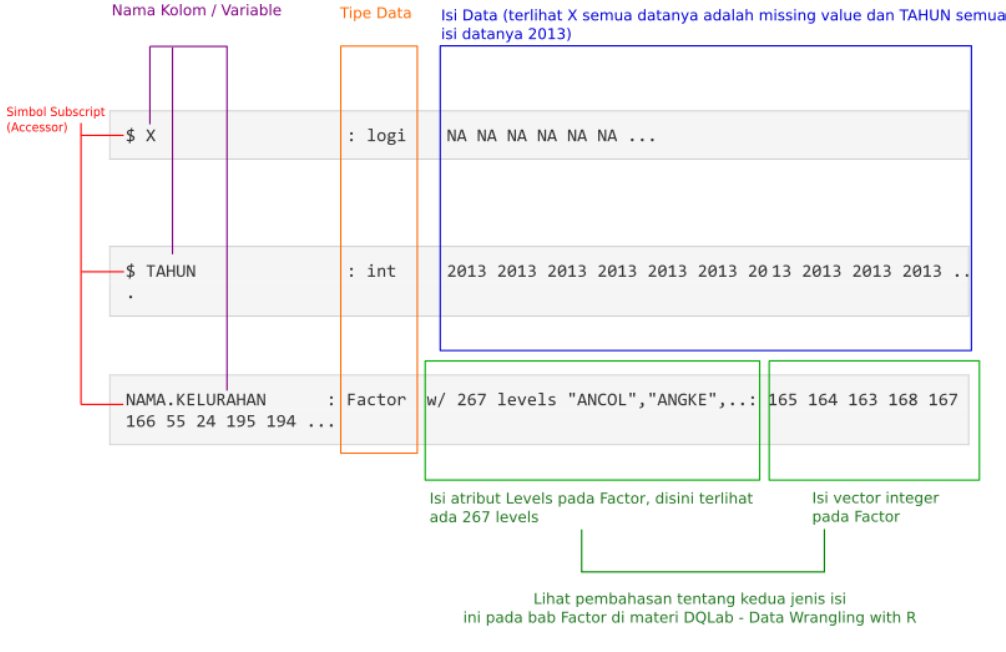

# Profile Dataset dengan Function summary
Selain perintah str, kita dapat juga menggunakan function summary untuk melihat kondisi dataset kita dalam bentuk ringkasan yang lebih detil.

Sebagai contoh, untuk melihat summary dari variable penduduk.dki maka kita gunakan konstruksi berikut.

summary(penduduk.dki)

Tugas Praktek

pada code editor dengan perintah summary  yang menggunakan input variable penduduk.dki.

Jika berjalan dengan lancar, maka outputnya akan terlihat hasilnya sebagai berikut.

Untuk angka, maka akan muncul statistik minimum, maximum, mean, meadian, 1st quantile, dan 3rd quantile. Sedangkan untuk nilai lain akan muncul jumlahnya di dataset.

In [ ]:
#Membaca dataset dengan read.csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")
summary(penduduk.dki)

# Menggunakan argumen check.names = FALSE
Jika kita perhatikan pada eksekusi read.csv dan hasilnya, terlihat ada kolom dengan prefix X – yaitu X, X.1, X.2, dan seterusnya. Ini terjadi karena read.csv mendeteksi ada nama kolom yang kosong dan lebih dari. Kondisi ini akan secara otomatis "diperbaiki" oleh function read.csv dengan menambahkan prefix X di depan kolom.

Jika kita tidak menginginkan hal tersebut, kita bisa tambahkan argumen check.names = FALSE pada statement read.csv sehingga konstruksinya menjadi:

read.csv(…, …, check.names = FALSE)
Cobalah lakukan tugas berikut untuk lebih jelasnya.

Tugas Praktek

Gantilah bagian […1…]  dengan argumen check.names = FALSE.

In [ ]:
#Membaca dataset dengan read.csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",", check.names = FALSE)
str(penduduk.dki)


Beberapa penjelasan terkait perbedaan hasil di atas dengan hasil pada praktek sebelumnya:

1. Nama spasi tidak dijadikan titik.
2. Nama yang kosong tidak diberi tanda X, ini akan menyulitkan ketika kita ingin mereferensikan nama kolom kosong tersebut.

# Membaca Tab Separated Value (TSV)
Untuk membaca file versi tsv dimana pemisah antar field adalah karakter tabulasi (tab) dari dataset kependudukan tersebut kita tetap gunakan function read.csv.

Perbedaannya hanyalah di argumen separator dimana sebelumnya adalah tanda koma (,), maka untuk tsv perlu diganti menjadi backslash t (\t).

sep="\t"

Dataset file untuk contoh tsv ini dapat Anda download di url berikut:

https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.tsv

Untuk membaca file tersebut dengan perintah read.csv adalah sebagai berikut.

penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.tsv", sep="\t")

Tugas Praktek

Gantilah bagian […1…] pada code editor untuk  membaca file tsv seperti yang ditunjukkan pada contoh di Lesson, dan masukkan hasilnya pada variable penduduk.dki.

In [ ]:
#Membaca dataset dengan read.csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.tsv", sep="\t")
penduduk.dki


# Membaca Dataset File Excel dengan read.xlsx
Jika membaca file teks berformat csv dan tsv hampir sama, maka untuk membaca file versi Excel dari dataset kependudukan tersebut kita perlu gunakan function read.xlsx dari library lain yang bernama openxlsx.

Function ini akan membaca isi dari file Excel menjadi data.frame di R.

Untuk praktek kita kali ini, file Excel yang akan kita baca berlokasi di url berikut:

https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.xlsx

Berikut adalah contoh konstruksi function read.xlsx untuk membaca file Excel tersebut.

penduduk.dki.xlsx <- read.xlsx(xlsxFile="https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.xlsx")

Tugas Praktek

Gantilah bagian […1…] pada code editor untuk  membaca file Excel seperti yang ditunjukkan pada contoh di Lesson, dan masukkan hasilnya pada variable penduduk.dki.xlsx. Pada baris terakhir code editor juga sudah ditambahkan function str sehingga kita bisa menganalisa struktur dan isi dari hasil pembacaan read.xlsx.

In [ ]:
library(openxlsx)
#Membaca dataset dengan read.xlsx dan dimasukkan ke variable penduduk.dki
penduduk.dki.xlsx <- read.xlsx(xlsxFile="https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.xlsx")
str(penduduk.dki.xlsx)


Terlihat perbedaan penting ketika kita membaca dengan read.xlsx dengan read.csv dan read.tsv secara default.

Beberapa diantaranya adalah sebagai berikut:

1. Karakter non karakter dan spasi seperti garis miring dan tanda kurung tetap ditampilkan apa adanya. Sedangkan jika menggunakan read.csv dan read.tsv akan diganti menjadi tanda titik.
2. Seluruh kolom akan diubah menjadi vector, sedangkan pada read.csv beberapa kolom akan menjadi factor.
3. Vector teks yang berulang akan tetap dibiarkan apa adanya, tidak diubah menjadi factor. Ini akan mengakibatkan beberapa masalah, salah satunya adalah pada saat plotting data – yang akan kita lihat pada praktek berikutnya.
4. Kolom kosong – dimana jika kita gunakan read.csv akan diisi dengan nama X, X.1, X.2, dan seterusnya – dihilangkan oleh fungsi read.xlsx ini.

# Kesimpulan
Anda telah menyelesaikan bab tentang membaca sumber data dengan tiga format, yaitu:

File teks berformat comma separated value (csv)
File teks berformat tab separated value (tsv)
File Excel berformat xlsx
Walaupun terlihat sederhana dan pendek dibanding bab lain, namun beberapa praktek pada bab ini memiliki metodologi dan fungsi penting yakni:

Bagaimana kita melakukan profil dengan function str dari tiap kali pembacaan file.
Dapat mengerti output yang dihasilkan oleh function str.
Dengan demikian, kita menjadi aware atau lebih perhatian karena perilaku yang berbeda ketika menangani kolom kosong dan juga pada saat penamaan variable kolom.
Dengan menguasai praktek-praktek ini, Anda akan lebih siap untuk "memperbaiki" struktur dan isi file tersebut jika diperlukan.

# Pendahuluan
Pada bab sebelumnya, terlihat file teks dan Excel yang dibaca memiliki masalahnya sendiri-sendiri. Sebagai contoh, read.csv mengakomodir kolom-kolom kosong sehingga harus kita buang. Sedangkan read.xlsx tidak menghasilkan Factor sehingga kita perlu waktu dan tenaga tambahan untuk mengidentifikasi dan mengolah kolom yang bersifat kategorik tersebut dengan melakukan konversi kolom tersebut menjadi Factor.

Selain itu terlihat juga ada beberapa kolom yang harusnya bisa dijumlahkan menjadi satu kolom – yaitu kolom 35-39.Perempuan, 40-44.Perempuan, dan seterusnya – menjadi kolom jumlah. Kemudian informasi umur di nama kolom tersebut sebenarnya dapat kita pisahkan menjadi kolom tersendiri.

Perkenalan function dan latihan untuk transformasi struktur seperti ini akan dilakukan sepanjang bab ini.

# Function names
Pada bab sebelumnya, kita menggunakan function str untuk melihat ringkasan dari struktur nama, tipe data, dan isi dari data.frame hasil pembacaan file.

Namun jika kita hanya ingin melihat nama-nama kolom saja, bisa menggunakan function bernama names, dengan konstruksi berikut.

names(variable)

Tugas Praktek

Gantilah bagian […1…] dengan function names dengan input variable variable data.frame hasil pembacaan file csv.

In [ ]:
#Membaca dataset csv
penduduk.dki.csv <-read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")
#Menggunakan names untuk variable penduduk.dki.csv
names(penduduk.dki.csv)



# Merubah Satu Nama Kolom
Function names ini juga bisa digunakan merubah nama kolom pada data.frame. Untuk merubahnya kita gunakan konstruksi berikut:

names(variable)[posisi] <- "nama_baru"

Dengan posisi adalah nomor indeks dari posisi nama kolom yang ingin diubah. Berikut adalah contoh dimana kita merubah nama kolom dari TAHUN ke PERIODE (posisi 1) dari dataset kita.

names(penduduk.dki.csv)[1] <- "PERIODE"

Tugas Praktek

Gantilah bagian […1…] dan […2…] dengan perintah yang merubah nama kolom dari dataset kependudukan.dki.csv pada posisi pertama dengan "PERIODE" dan posisi kedua dengan "PROPINSI".

In [ ]:
#Membaca dataset csv
penduduk.dki.csv <-read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")
names(penduduk.dki.csv)[1] <- "PERIODE"
names(penduduk.dki.csv)[2] <- "PROPINSI"
names(penduduk.dki.csv)


# Merubah Sejumlah Nama Kolom
Perintah untuk merubah dua kolom pada praktek sebelumnya bisa disingkat dengan konstruksi berikut:

names(variable)[c(rentang_posisi)] <- c("nama_baru_1", "nama_baru_2")
Dengan rentang_posisi adalah daftar nomor dari posisi indeks dari nama kolom yang ingin diubah. Berikut adalah contoh dimana kita merubah nama kolom dari TAHUN ke PERIODE (posisi 1) dari dataset kita.

names(penduduk.dki.csv)[c(1:2)] <- c("PERIODE", "PROPINSI")
Tugas Praktek

Gantilah bagian […1…] dengan perintah yang merubah nama kolom dari dataset kependudukan.dki.csv pada posisi pertama dengan "PERIODE" dan posisi kedua dengan "PROPINSI".

In [ ]:
#Membaca dataset csv
penduduk.dki.csv <-read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")
names(penduduk.dki.csv)[c(1:2)] <- c("PERIODE", "PROPINSI")
names(penduduk.dki.csv)


# Membuang Kolom dengan Bantuan Operator %in%
Pada bab sebelumnya, data.frame hasil pembacaan read.csv memiliki kolom X, X.1, X.2, X.3 s/d kolom X.11 yang kosong semua dan sebenarnya tidak diperlukan.

Kita dapat menghilangkan kolom-kolom ini dengan contoh berikut:

penduduk.dki.csv <- penduduk.dki.csv[,!names(penduduk.dki.csv) %in% c("X", "X.1","X.2","X.3","X.4","X.5","X.6","X.7","X.8","X.9","X.10")]

Penjelasan tiap elemen dari perintah tersebut adalah sebagai berikut.
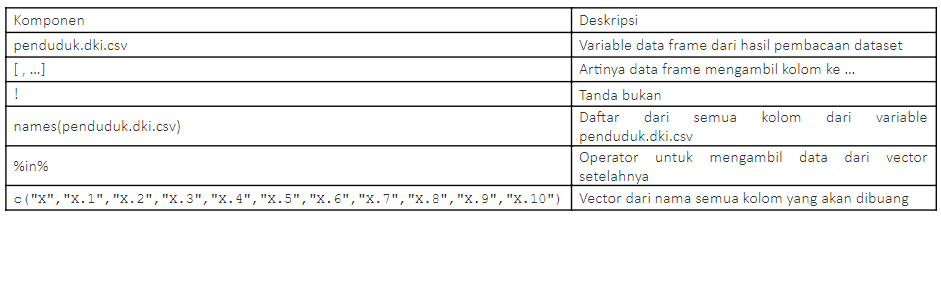
Atau terjemahan dari seluruh konstruksi tersebut adalah mengambil data dari data.frame penduduk.dki.csv dengan kolom-kolom yang tidak termasuk pada "X", "X.1", "X.2", "X.3", dan seterusnya sampai dengan "X.10".

Tugas Praktek

Gantilah bagian […1…] pada code editor untuk  membaca file Excel seperti yang ditunjukkan pada contoh di Lesson, namun dengan tambahan kolom "X.11".

In [ ]:
#Membaca dataset csv
penduduk.dki.csv <-read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")
#Membuang kolom X, X.1, X.2 s/d X.11
penduduk.dki.csv <- penduduk.dki.csv[,!names(penduduk.dki.csv) %in% c("X", "X.1","X.2","X.3","X.4","X.5","X.6","X.7","X.8","X.9","X.10", "X.11")]
names(penduduk.dki.csv)


# Merubah Tipe Kolom menjadi Factor
Kita akan beralih sekarang ke dataset kependudukan DKI versi Excel, dimana terdapat perbedaan perilaku antara read.xlsx dan read.csv, yaitu secara default read.xlsx tidak mengkonversi kolom kategorik sebagai teks (character).

Untuk melakukan konversi sebagai factor, kita gunakan function as.factor. Berikut adalah konstruksi konversi dari satu kolom data.frame.

as.factor(data.frame$namakolom)

Tugas Praktek

Gantilah bagian […1…] pada code editor untuk melakukan konversi kolom NAMA.PROVINSI dari variable penduduk.dki.xlsx.

Jika berjalan dengan lancar, maka hasilnya akan tampak sebagai berikut – perhatikan jika  NAMA.PROVINSI sudah bertipe Factor, sedangkan kolom lain seperti NAMA.KABUPATEN/KOTA yang harusnya bertipe Factor masih bertipe character (chr).

In [ ]:
library(openxlsx)
#Membaca dataset dengan read.xlsx dan dimasukkan ke variable penduduk.dki
penduduk.dki.xlsx <- read.xlsx(xlsxFile="https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.xlsx")
penduduk.dki.xlsx$NAMA.PROVINSI <- as.factor(penduduk.dki.xlsx$NAMA.PROVINSI)
str(penduduk.dki.xlsx)


# Mengambil Kolom Laki.Laki / Perempuan dengan grep
Kalau kita perhatikan pada dataset kependudukan DKI, kolom-kolom untuk jumlah penduduk berdasarkan umur dan jenis kelamin bentuknya adalah seperti berikut.
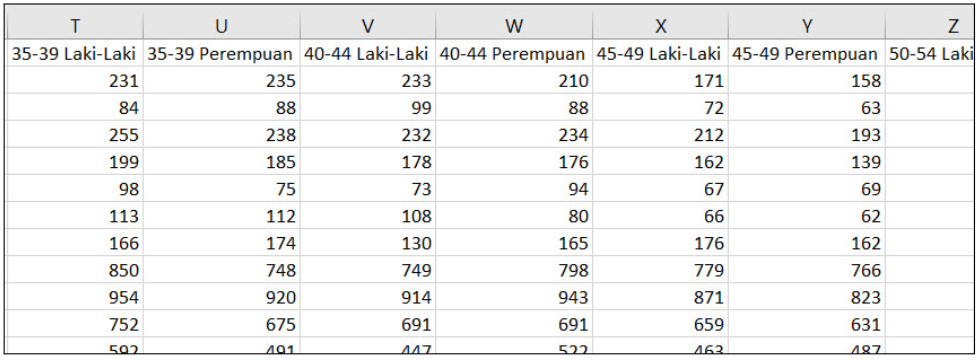
Dengan ada pola nama seperti itu, kita bisa mengambil dengan function grep dengan syntax berikut.

grep(pattern="pola", x = vector, ignore.case=TRUE)

Pola teks yang digunakan oleh grep adalah menggunakan regular expression (regex). Regex sendiri adalah konstruksi pola yang sangat komplit untuk mengolah teks, namun untuk case kita gunakan teks sederhana saja sebagai berikut:

1. "laki-laki": untuk mengambil pola kolom yang mengandung teks Laki-Laki.
2. "perempuan": untuk mengambil pola kolom yang mengandung teks "Perempuan".
3. "(perempuan|laki-laki)": untuk mengambil pola kolom yang mengandung teks "Perempuan" ataupun "Laki-Laki".

Argumen x dimana kita memasukkan vector. Dan ignore.case = TRUE menyatakan bahwa pola yang kita tidak bersifat case sensitive – artinya huruf besar tidak dibedakan dari huruf kecil.

Function grep ini akan mengembalikan posisi-posisi indeks dari vector yang ditemukan polanya.

Sebagai contoh, untuk mengambil kolom yang mengandung "Perempuan" pada nama-nama kolom dari dataset kependudukan kita gunakan perintah berikut:

grep(pattern="perempuan", x = names(penduduk.dki.xlsx), ignore.case=TRUE)

Ini akan menghasilkan vector berikut.

[1]  9 11 13 15 17 19 21 23 25
Yang merupakan daftar posisi dari nama kolom yang mengandung teks "perempuan".

Tugas Praktek

Ganti bagian […1…] dengan function grep menampilkan nama-nama kolom yang mengandung kata "perempuan" - seluruhnya menggunakan huruf kecil.

Kemudian pada bagian […2…] tampilkan data-data dari nama-nama kolom yang mengandung kata "laki-laki" - seluruhnya menggunakan huruf kecil..

In [ ]:
library(openxlsx)
penduduk.dki.xlsx <- read.xlsx(xlsxFile="https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.xlsx")
#Tampilkan nama-nama kolom yang mengandung kata "perempuan".
pola_nama_perempuan <- grep(pattern="perempuan", x = names(penduduk.dki.xlsx), ignore.case=TRUE)
names(penduduk.dki.xlsx[pola_nama_perempuan])

#Tampilkan nama-nama kolom yang mengandung kata "laki-laki"
pola_nama_laki_laki <- grep(pattern="laki-laki", x = names(penduduk.dki.xlsx), ignore.case=TRUE)
names(penduduk.dki.xlsx[pola_nama_laki_laki])


# Menambahkan kolom Penjumlahan
Kita dapat menambahkan kolom pada data.frame langsung dengan menggunakan simbol subscript $ diikuti dengan nama kolom baru yang kita kehendaki. Misalkan untuk membuat kolom PEREMPUAN35TAHUNKEATAS pada variable penduduk.dki.xlsx, kita bisa menuliskan:

penduduk.dki.xlsx$PEREMPUAN35TAHUNKEATAS

Kolom baru ini kita bisa isi, misalkan dengan penjumlahan dari kolom-kolom dari dataset itu sendiri meggunakan function rowSums dari kolom-kolom data.frame. Syntaxnya adalah sebagai berikut:

rowSums(data.frame)

Sebagai contoh – menyambung dari praktek sebelumnya juga – untuk menjumlahkan kolom yang mengandung teks "perempuan" sebagai berikut:

rowSums(penduduk.dki.xlsx[,grep(pattern="perempuan", x = names(penduduk.dki.xlsx), ignore.case=TRUE)])

Dan untuk menambahkan hasil penjumlahan ini ke kolom baru di atas, kita gabungkan perintahnya dalam bentuk sebagai berikut.

penduduk.dki.xlsx$PEREMPUAN35TAHUNKEATAS <- rowSums(penduduk.dki.xlsx[grep(pattern="perempuan", x = 
names(penduduk.dki.xlsx), ignore.case=TRUE)])

Tugas Praktek

Ganti bagian […1…] dan […2…] dengan perintah menjumlahkan dataset dengan nama-nama kolom yang mengandung kata "perempuan". Hasilnya masukkan sebagai kolom baru dengan nama PEREMPUAN35TAHUNKEATAS dari dataset penduduk.dki.xlsx.

Perhatikan juga bahwa pola untuk nama kolom mengandung teks "perempuan" sudah disimpan ke variable bernama pola_nama_perempuan. Gunakan variable tersebut sebagai bagian jawaban.

In [ ]:
library(openxlsx)
penduduk.dki.xlsx <- read.xlsx(xlsxFile="https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.xlsx")
#Tampilkan nama-nama kolom yang mengandung kata "perempuan".
pola_nama_perempuan <- grep(pattern="perempuan", x = names(penduduk.dki.xlsx), ignore.case=TRUE)
penduduk.dki.xlsx$PEREMPUAN35TAHUNKEATAS  <- rowSums(penduduk.dki.xlsx[pola_nama_perempuan])

# Normalisasi Data dari Kolom ke Baris
Kalau kita perhatikan lima kolom data pada table berikut di bawah ini – yang diambil dari dataset kependudukan DKI – maka dua kolom terakhir (berwarna kuning dan hijau) sebenarnya mengandung tiga variable, yaitu: rentang umur, jenis kelamin, dan jumlah penduduk.
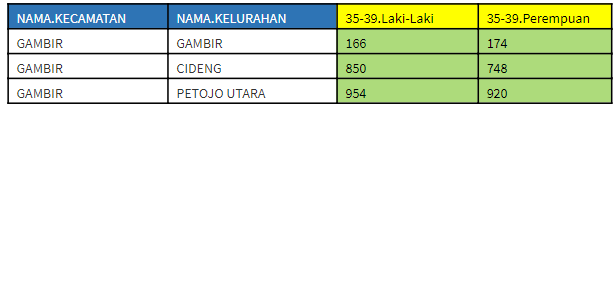

Dan dari sisi prinsip kerapian data, satu variable data harusnya masing-masing menempati satu kolom tersendiri. Dan berdasarkan prinsip tersebut, kolom "NAMA.KECAMATAN" dan "NAMA.KELURAHAN" yang berwarna biru sudah memenuhi persyaratan. Namun kolom "35-39.Laki-Laki" dan kolom "35-39.Perempuan"  tidak memenuhi persyaratan.  

Kita akan coba merapikan ini dengan dua tahap:

Melakukan normalisasi kolom dari baris ke kolom
Memisahkan kolom
Kita mulai dari tahap pertama pada praktek kali ini, dimana kita akan merubah struktur data di atas menjadi berikut.
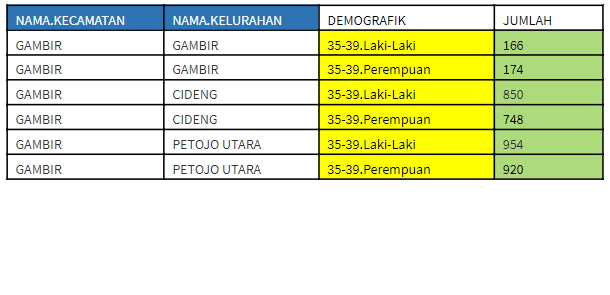

Terlihat nama kolom "35-39.Laki-Laki" dan "35-39.Perempuan" dipivot menjadi nilai baris data di bawah kolom "DEMOGRAFIK".

Kemudian angka-angka jumlah penduduk yang tadinya di bawah kedua kolom tersebut sekarang ada di bawah kolom "JUMLAH".

Untuk melakukan transformasi struktur ini, kita akan gunakan function melt dari package reshape2. Berikut adalah contoh penggunaannya:

melt(data=penduduk.dki.xlsx, id.vars=c( "NAMA.KECAMATAN", "NAMA.KELURAHAN"), measure.vars = c("35-39.Laki-Laki", "35-39.Perempuan"), variable.name = "DEMOGRAFIK", value.name="JUMLAH")
Penjelasan dari perintah tersebut adalah sebagai berikut:
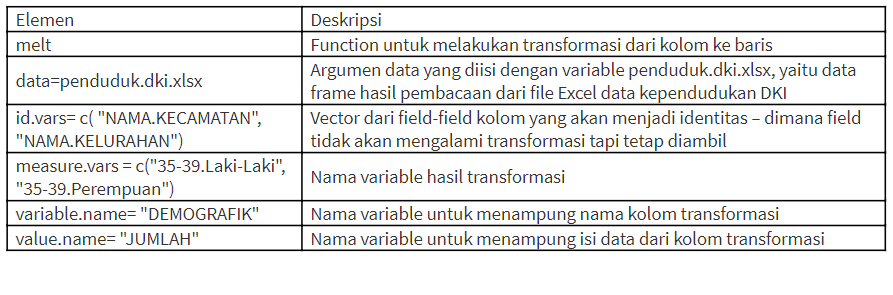

In [ ]:
library(openxlsx)
library(reshape2)
penduduk.dki.xlsx <- read.xlsx(xlsxFile="https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.xlsx")
#Transformasi kolom dataset penduduk.dki.xlsx, disimpan ke variable penduduk.dki.transform
penduduk.dki.transform <- melt(data=penduduk.dki.xlsx, id.vars=c( "NAMA.KECAMATAN", "NAMA.KELURAHAN"), measure.vars = c("35-39.Laki-Laki", "35-39.Perempuan"), variable.name = "DEMOGRAFIK", value.name="JUMLAH")

#Menampilkan variable penduduk.dki.transform
penduduk.dki.transform


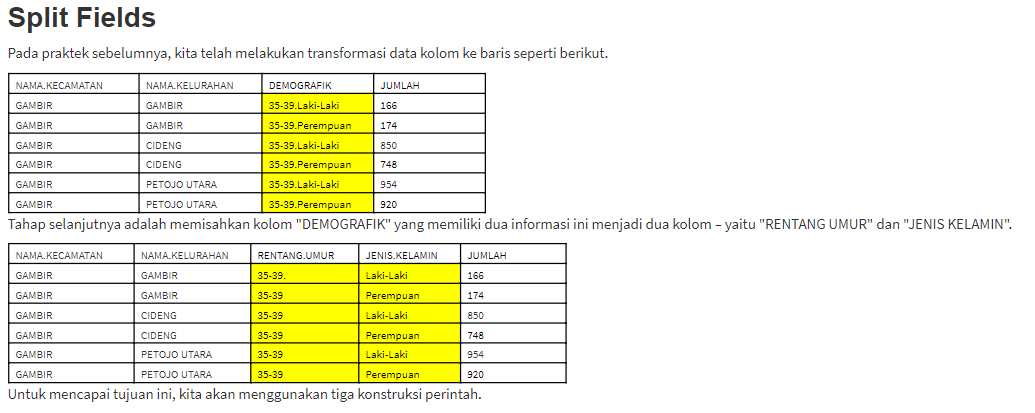

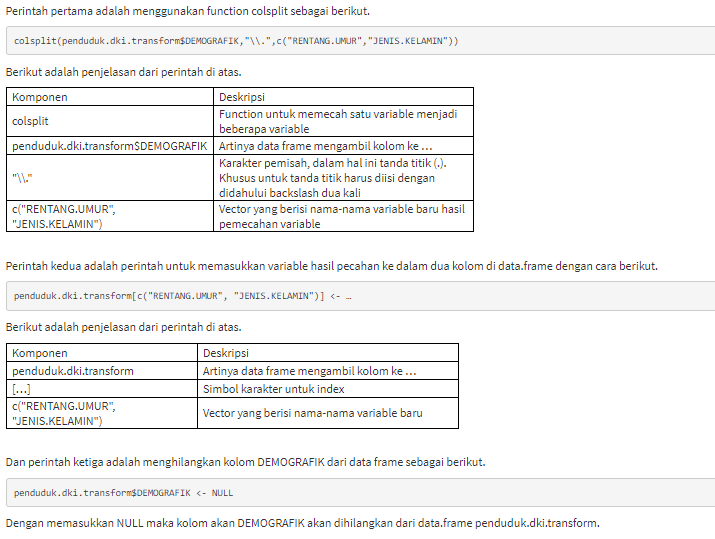

# Tugas Praktek

Ganti bagian […1…] pada code editor dengan perintah untuk memecah isi dari field "DEMOGRAFIK" menjadi "RENTANG.UMUR" dan "JENIS.KELAMIN". Tanda pemisah adalah tanda titik.

Kemudian ganti […2…] dengan penambahan kolom "RENTANG.UMUR" dan "JENIS.KELAMIN" data.frame penduduk.dki.xlsx.

Terakhir, ganti […3…] dengan kolom "DEMOGRAFIK" dari variable penduduk.dki.transform.

In [ ]:
library(openxlsx)
library(reshape2)
penduduk.dki.xlsx <- read.xlsx(xlsxFile="https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.xlsx")
penduduk.dki.transform <- melt(data=penduduk.dki.xlsx, id.vars=c( "NAMA.KECAMATAN", "NAMA.KELURAHAN"), measure.vars = c("35-39.Laki-Laki", "35-39.Perempuan"), variable.name = "DEMOGRAFIK", value.name="JUMLAH") 
#Memecah isi kolom DEMOGRAFIK menjadi "RENTANG.UMUR" dan "JENIS.KELAMIN"
penduduk.dki.transform[c("RENTANG.UMUR", "JENIS.KELAMIN")]  <- colsplit(penduduk.dki.transform$DEMOGRAFIK,"\\.",c("RENTANG.UMUR","JENIS.KELAMIN"))
penduduk.dki.transform$DEMOGRAFIK <- NULL
penduduk.dki.transform


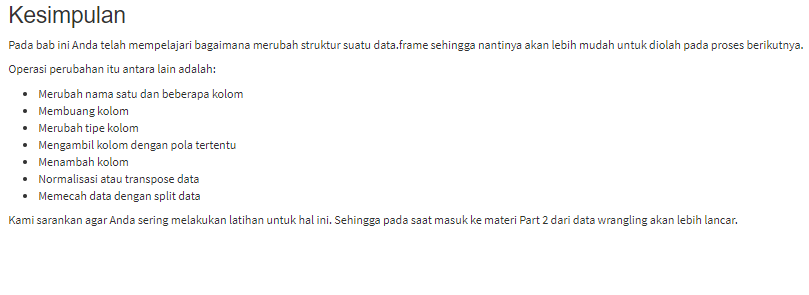

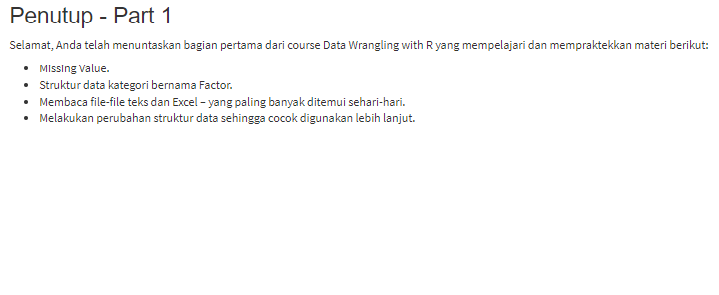